## Linear Regression

This notebook will construct data to train linear regression models on that is:
* 1 dim & linear
* multi-dim & linear
* 1 dim & non-linear
* multi-dim & non-linear

We train linear models and models with non-linearities.

## 0. Preliminaries

In [1]:
# Import Statements

import torch
from torch import nn

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from helper_functions import plot_predictions, plot_loss
from models import LinearRegressionModelV0, train_step_regression, test_step_regression

In [2]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device is {device}")

# random number seed
rns=42

Device is cpu


## 1. Create Linear data

* a. Generate it.
* b. split it into train & test
* b. Visualize it. 
* c. Format it into tensors.

In [3]:
# a. Generate data
dims=3
X, y, coef = make_regression(n_samples=100, n_features=dims, noise=0, bias=5, coef=True, random_state=rns)

In [4]:
#X.shape, y.shape, coef, type(X), type(y)

In [5]:
# b. Split data into train & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rns)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 3), (20, 3), (80,), (20,))

In [7]:
#X_train[:,0].shape, y_train.shape, X_test[:,0].shape, y_test.shape

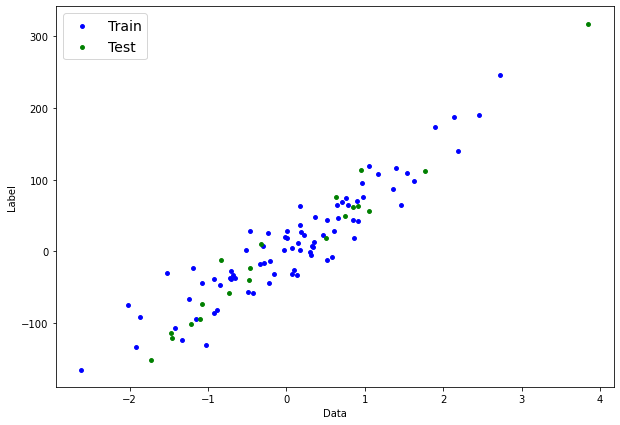

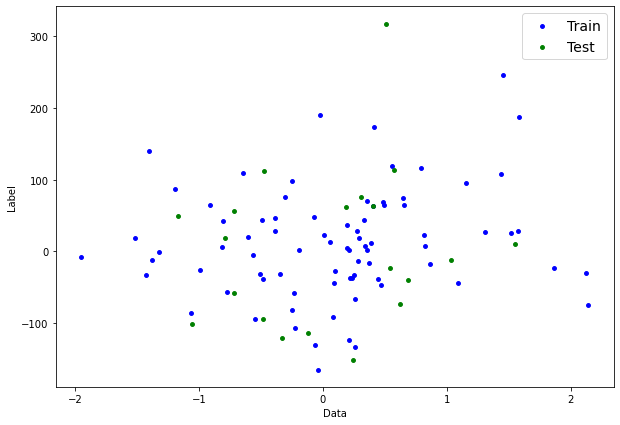

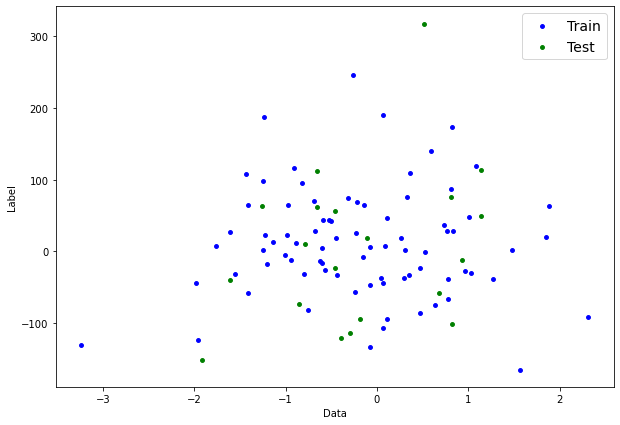

In [8]:
# c. Visualize data 

for dim in range(dims):
    plot_predictions(train_data = X_train[:,dim],
                    train_labels = y_train,
                    test_data = X_test[:,dim],
                    test_labels = y_test
                    )

In [9]:
# d. convert numpy into torch tensors and put them onto device

X_train = torch.from_numpy(X_train).type(torch.float32).to(device)
y_train = torch.from_numpy(y_train).type(torch.float32).to(device)
X_test = torch.from_numpy(X_test).type(torch.float32).to(device)
y_test = torch.from_numpy(y_test).type(torch.float32).to(device)

In [10]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([80, 3]), torch.Size([20, 3]), torch.Size([80]), torch.Size([20]))

In [11]:
# Make y_train & y_test dimensions to be same as what model will predict - ie model0(X).

y_train = y_train.unsqueeze(dim=1)
y_test = y_test.unsqueeze(dim=1)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([80, 3]),
 torch.Size([20, 3]),
 torch.Size([80, 1]),
 torch.Size([20, 1]))

## 2. Build and instantiate Model

In [13]:
# models built / defined in models.py

# instantiate model
model0 = LinearRegressionModelV0(in_dim=dims).to(device) # single linear layer with 'dims' weight terms & 1 bias term.

In [14]:
model0.state_dict()

OrderedDict([('linear_layer1.weight', tensor([[-0.3305, -0.1182,  0.5356]])),
             ('linear_layer1.bias', tensor([0.3719]))])

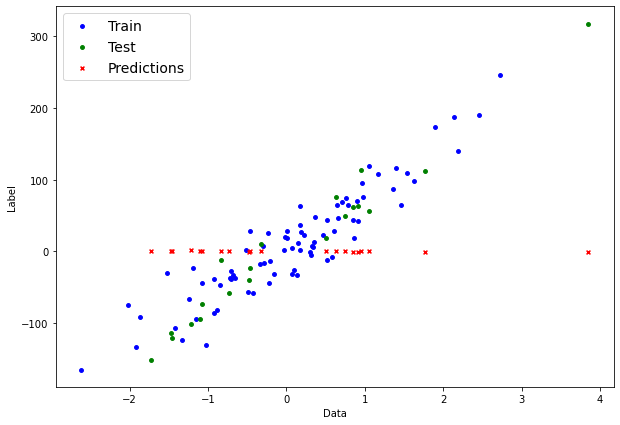

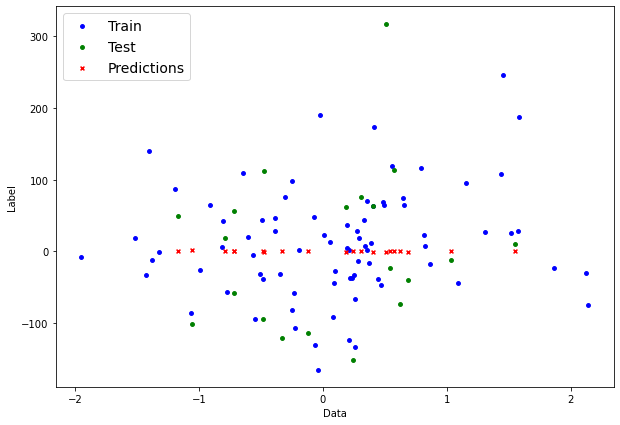

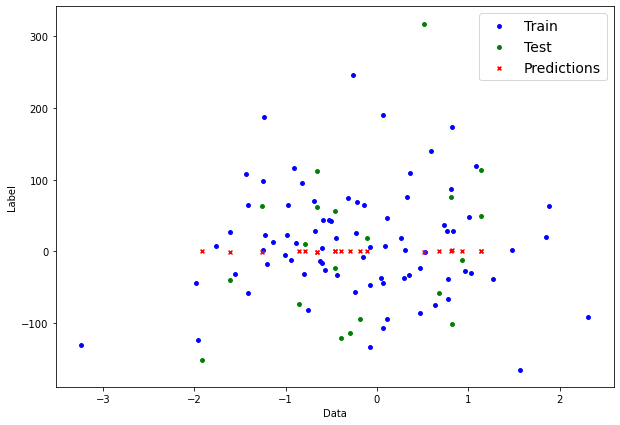

In [15]:
# Make predictions with untrained model and visualize
with torch.inference_mode():
    preds = model0(X_test)
    
for dim in range(dims):
    plot_predictions(train_data = X_train[:,dim],
                    train_labels = y_train,
                    test_data = X_test[:,dim],
                    test_labels = y_test,
                    predictions = preds
                    )

## 3. Train model

In [16]:
# Setup loss function and optimizer
loss_fn = nn.L1Loss() 
# loss_fn = nn.MSELoss() 

optimizer = torch.optim.SGD(params = model0.parameters(),
                            lr = 0.1)

In [17]:
# Setup lists to gather loss through training
epoch_count = []
loss_count = []
test_loss_count = []

epochs = 3000
test_freq = 100

# 1. Loop through all data
for epoch in range(epochs):

    # 2. Training step
    loss = train_step_regression(data = X_train,
                                 labels = y_train,
                                 model = model0,
                                 loss_fn = loss_fn,
                                 optimizer = optimizer)
    
    # 3. print what's happening at test_freq
    if epoch % test_freq == 0:
        
        # 4. Test step
        test_loss = test_step_regression(data = X_test,
                                         labels = y_test,
                                         model = model0,
                                         loss_fn = loss_fn) 
        
        # Collect performance into lists
        epoch_count.append(epoch)
        loss_count.append(loss.item())
        test_loss_count.append(test_loss.item())
        
        # Print performance
        print(f"Epoch: {epoch:5d} | loss: {loss:.6f} | test loss: {test_loss:.6f}")





Epoch:     0 | loss: 58.272816 | test loss: 83.578461
Epoch:   100 | loss: 52.705975 | test loss: 75.808655
Epoch:   200 | loss: 47.243187 | test loss: 68.039047
Epoch:   300 | loss: 42.006504 | test loss: 60.351238
Epoch:   400 | loss: 36.897728 | test loss: 52.938152
Epoch:   500 | loss: 32.128876 | test loss: 46.047668
Epoch:   600 | loss: 27.586529 | test loss: 39.420986
Epoch:   700 | loss: 23.044186 | test loss: 32.794304
Epoch:   800 | loss: 18.535816 | test loss: 26.185074
Epoch:   900 | loss: 14.083811 | test loss: 19.688303
Epoch:  1000 | loss: 9.872551 | test loss: 13.656595
Epoch:  1100 | loss: 5.804285 | test loss: 8.001350
Epoch:  1200 | loss: 1.779732 | test loss: 2.438077
Epoch:  1300 | loss: 0.040953 | test loss: 0.049539
Epoch:  1400 | loss: 0.040953 | test loss: 0.049539
Epoch:  1500 | loss: 0.040953 | test loss: 0.049539
Epoch:  1600 | loss: 0.040953 | test loss: 0.049539
Epoch:  1700 | loss: 0.040953 | test loss: 0.049539
Epoch:  1800 | loss: 0.040953 | test loss: 

## 4. Visualize results

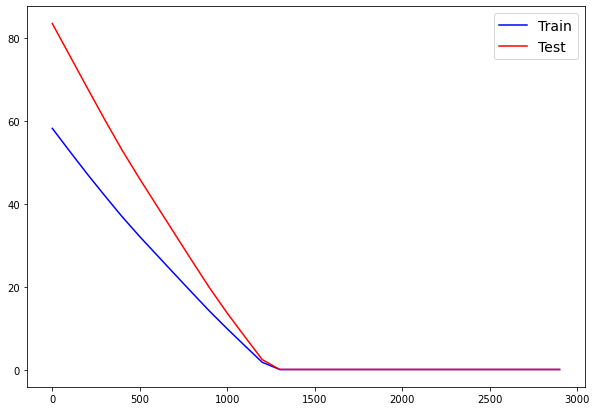

In [18]:
# Plot the loss
plot_loss(epoch = epoch_count,
         loss = loss_count,
         test_loss = test_loss_count,
         y_scale='linear')

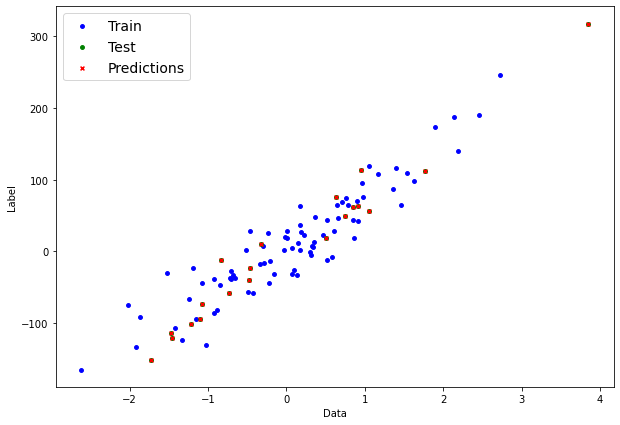

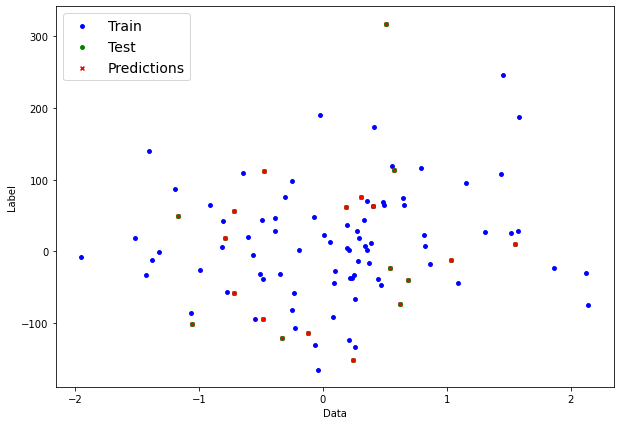

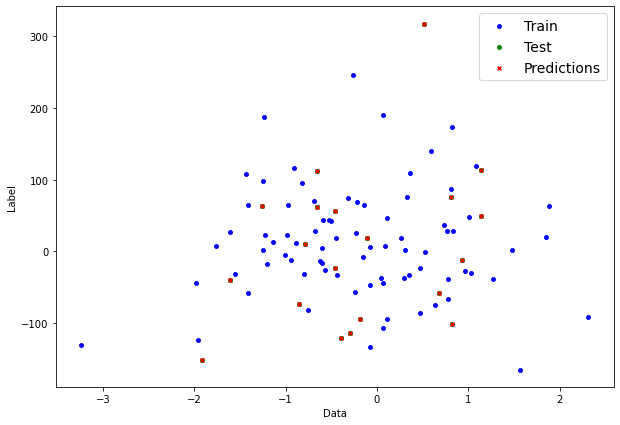

In [19]:
# Make predictions with trained model and visualize
with torch.inference_mode():
    preds = model0(X_test)
    
for dim in range(dims):
    plot_predictions(train_data = X_train[:,dim],
                    train_labels = y_train,
                    test_data = X_test[:,dim],
                    test_labels = y_test,
                    predictions = preds
                    )

In [20]:
model0.state_dict()

OrderedDict([('linear_layer1.weight', tensor([[75.0370, 28.2131, 17.7705]])),
             ('linear_layer1.bias', tensor([4.9844]))])

In [21]:
coef

array([75.06147516, 28.20345726, 17.74395438])